In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from tabulate import tabulate
from sklearn.metrics import precision_score, recall_score, f1_score

## 1. Dataset: Iris Dataset

In [2]:
df=pd.read_csv("Iris.csv")

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## 3. Drop redundant columns

In [3]:
df.drop('Id', axis=1, inplace=True)

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 4. View the summary of the dataset

In [4]:
print("Summary of the dataset:")
print(df.describe())
print()
print("Summary of the dataset:")
print(df.info())

Summary of the dataset:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Sp

## 7. Check data types of columns of data frame

In [5]:
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


## 8. Identify Missing values, NAN in variables

In [6]:
print("Missing values count:")
print(df.isnull().sum())

Missing values count:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## 9. Check the distribution of variables using histograms

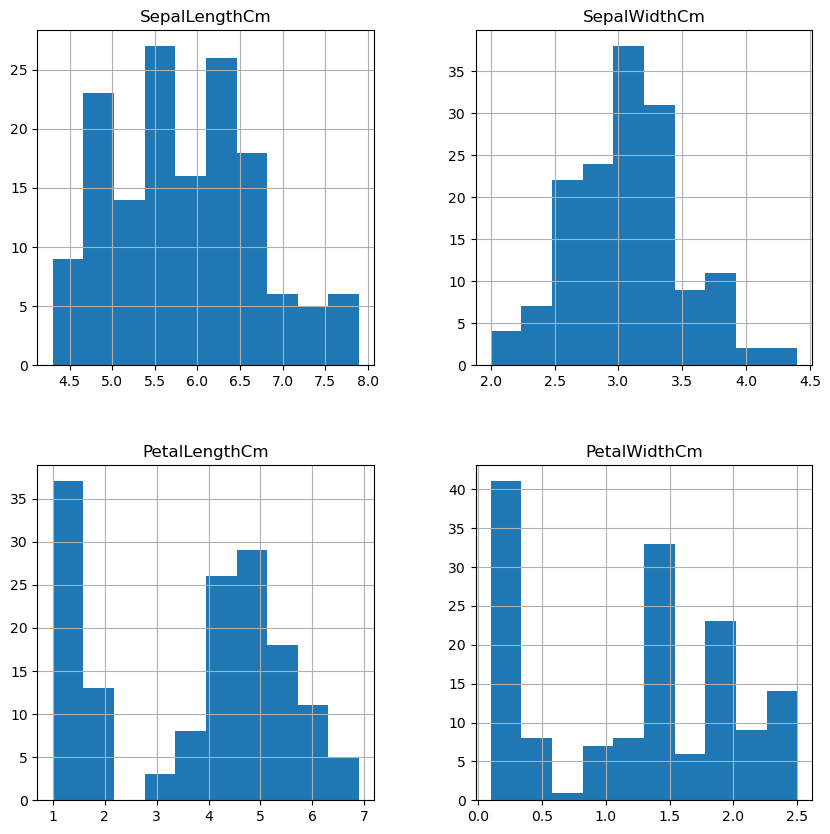

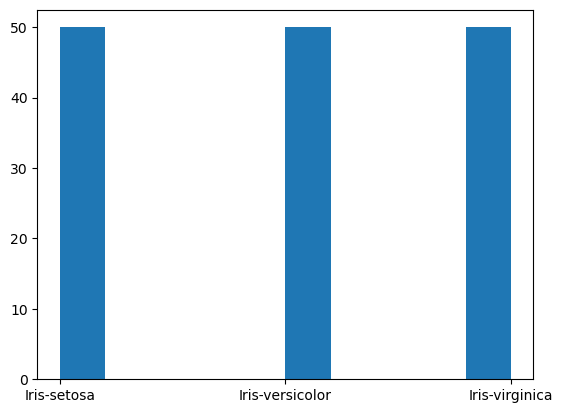

In [7]:
df.hist(figsize=(10, 10))
plt.show()
plt.hist(x=df['Species'])
plt.show()

## 10. Estimate correlation coefficients and represent using heatmaps

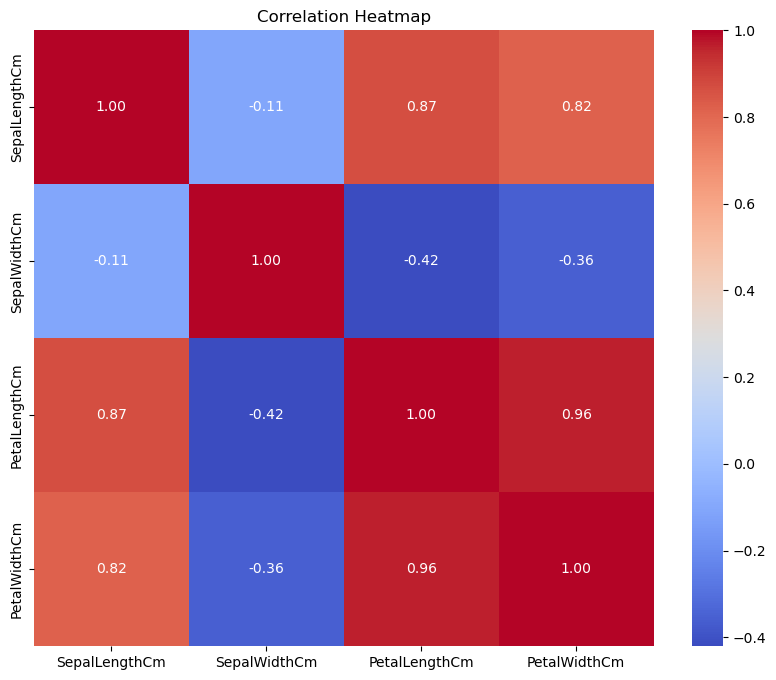

In [8]:
df2 = df.drop('Species',axis=1)
corr = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [9]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
df["Species"]=df["Species"].map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [11]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 11. Declare feature vector and target variable

In [12]:
y = df['Species']
X = df.drop('Species', axis=1)

In [13]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

## 12. Split data into separate training and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [16]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
39,5.1,3.4,1.5,0.2
53,5.5,2.3,4.0,1.3
79,5.7,2.6,3.5,1.0
10,5.4,3.7,1.5,0.2
50,7.0,3.2,4.7,1.4
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


In [17]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
82,5.8,2.7,3.9,1.2
134,6.1,2.6,5.6,1.4
114,5.8,2.8,5.1,2.4
42,4.4,3.2,1.3,0.2
109,7.2,3.6,6.1,2.5
57,4.9,2.4,3.3,1.0
1,4.9,3.0,1.4,0.2
70,5.9,3.2,4.8,1.8
25,5.0,3.0,1.6,0.2
84,5.4,3.0,4.5,1.5


In [18]:
y_train

39     0
53     1
79     1
10     0
50     1
      ..
8      0
73     1
144    2
118    2
99     1
Name: Species, Length: 120, dtype: int64

In [19]:
y_test

82     1
134    2
114    2
42     0
109    2
57     1
1      0
70     1
25     0
84     1
66     1
133    2
102    2
107    2
26     0
23     0
123    2
130    2
21     0
12     0
71     1
128    2
48     0
72     1
88     1
148    2
74     1
96     1
63     1
132    2
Name: Species, dtype: int64

## 13. Perform Feature Scaling(Normalize)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[-0.88140924,  0.72750289, -1.23547394, -1.26527703],
       [-0.40389633, -1.69139841,  0.17434798,  0.16834158],
       [-0.16513988, -1.03169805, -0.10761641, -0.22264531],
       [-0.52327456,  1.38720324, -1.23547394, -1.26527703],
       [ 1.38677706,  0.28770265,  0.56909811,  0.29867054],
       [-1.00078746,  0.50760277, -1.29186681, -1.26527703],
       [-1.00078746,  0.94740301, -1.17908106, -0.74396117],
       [ 2.22242464, -0.15209758,  1.35859839,  1.47163122],
       [-1.00078746,  0.94740301, -1.34825969, -1.13494806],
       [ 0.6705077 ,  0.28770265,  0.90745537,  1.47163122],
       [-0.04576165, -0.81179793,  0.79466962,  0.95031536],
       [-0.28451811, -1.25159817,  0.1179551 , -0.09231635],
       [-0.88140924,  0.94740301, -1.29186681, -1.13494806],
       [-0.88140924,  1.60710336, -1.17908106, -1.26527703],
       [ 0.78988593, -0.59189782,  0.51270524,  0.42899951],
       [ 0.43175125, -0.59189782,  0.62549099,  0.8199864 ],
       [ 0.07361657, -0.

In [22]:
X_test

array([[-0.04576165, -0.81179793,  0.1179551 ,  0.03801261],
       [ 0.31237303, -1.03169805,  1.076634  ,  0.29867054],
       [-0.04576165, -0.59189782,  0.79466962,  1.60196018],
       [-1.71705682,  0.28770265, -1.34825969, -1.26527703],
       [ 1.62553351,  1.16730313,  1.35859839,  1.73228915],
       [-1.12016569, -1.47149829, -0.22040216, -0.22264531],
       [-1.12016569, -0.15209758, -1.29186681, -1.26527703],
       [ 0.07361657,  0.28770265,  0.62549099,  0.8199864 ],
       [-1.00078746, -0.15209758, -1.17908106, -1.26527703],
       [-0.52327456, -0.15209758,  0.45631236,  0.42899951],
       [-0.28451811, -0.15209758,  0.45631236,  0.42899951],
       [ 0.55112948, -0.59189782,  0.79466962,  0.42899951],
       [ 1.50615529, -0.15209758,  1.24581263,  1.21097329],
       [ 1.74491174, -0.3719977 ,  1.47138414,  0.8199864 ],
       [-1.00078746,  0.72750289, -1.17908106, -1.0046191 ],
       [-0.88140924,  0.50760277, -1.12268818, -0.87429013],
       [ 0.55112948, -0.

## 14. Fit the K Neighbours Classifier to the training set

In [23]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 15. Predict test-set results 

In [24]:
y_pred = classifier.predict(X_test)

y_pred

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2], dtype=int64)

## 16. Check the accuracy score 

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy Score:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.9
Precision: 0.9022222222222224
Recall: 0.9
F1 Score: 0.8997929606625258


## 17. Compare the train-set and test-set accuracy

In [26]:
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)
print("Train set Accuracy:", train_accuracy)
print("Test set Accuracy:", test_accuracy)

Train set Accuracy: 0.975
Test set Accuracy: 0.9


## 18. Rebuild the kNN Classification model using different values of k (3,4,5,6,7,8,9)

In [27]:
k_values = [3, 4, 5, 6, 7, 8, 9]
results = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append([k, accuracy, precision, recall, f1])

print(tabulate(results, headers=['K', 'Accuracy', 'Precision', 'Recall', 'F1-score'], tablefmt='grid'))

+-----+------------+-------------+----------+------------+
|   K |   Accuracy |   Precision |   Recall |   F1-score |
+=====+============+=============+==========+============+
|   3 |   0.9      |    0.902222 | 0.9      |   0.899793 |
+-----+------------+-------------+----------+------------+
|   4 |   0.9      |    0.902222 | 0.9      |   0.899793 |
+-----+------------+-------------+----------+------------+
|   5 |   0.933333 |    0.933333 | 0.933333 |   0.933333 |
+-----+------------+-------------+----------+------------+
|   6 |   0.966667 |    0.969444 | 0.966667 |   0.966598 |
+-----+------------+-------------+----------+------------+
|   7 |   0.966667 |    0.969444 | 0.966667 |   0.966598 |
+-----+------------+-------------+----------+------------+
|   8 |   0.966667 |    0.969444 | 0.966667 |   0.966598 |
+-----+------------+-------------+----------+------------+
|   9 |   0.933333 |    0.933333 | 0.933333 |   0.933333 |
+-----+------------+-------------+----------+-----------

## 19. Tabulate the results using the Tabulate package

In [28]:
selected_columns = [[row[0], row[1], row[2]] for row in results]

print(tabulate(selected_columns, headers=['K', 'Train Accuracy', 'Test Accuracy']))

  K    Train Accuracy    Test Accuracy
---  ----------------  ---------------
  3          0.9              0.902222
  4          0.9              0.902222
  5          0.933333         0.933333
  6          0.966667         0.969444
  7          0.966667         0.969444
  8          0.966667         0.969444
  9          0.933333         0.933333


## 20. Display confusion matrix

<Axes: >

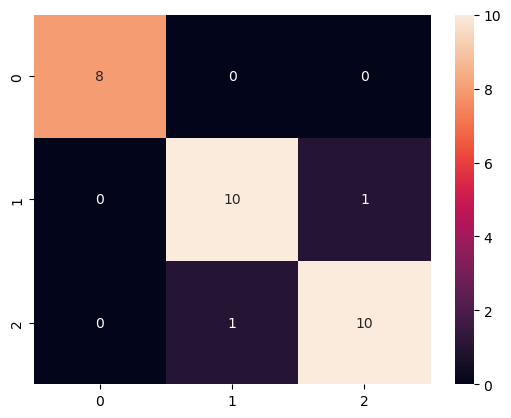

In [29]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

## 21. Generate classification report

In [30]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



## 22. Evaluate classification error

In [31]:
error = np.mean(y_pred != y_test)
print("Classification Error:", error)

Classification Error: 0.06666666666666667


## 23. Generate ROC curve and ROC AUC score.

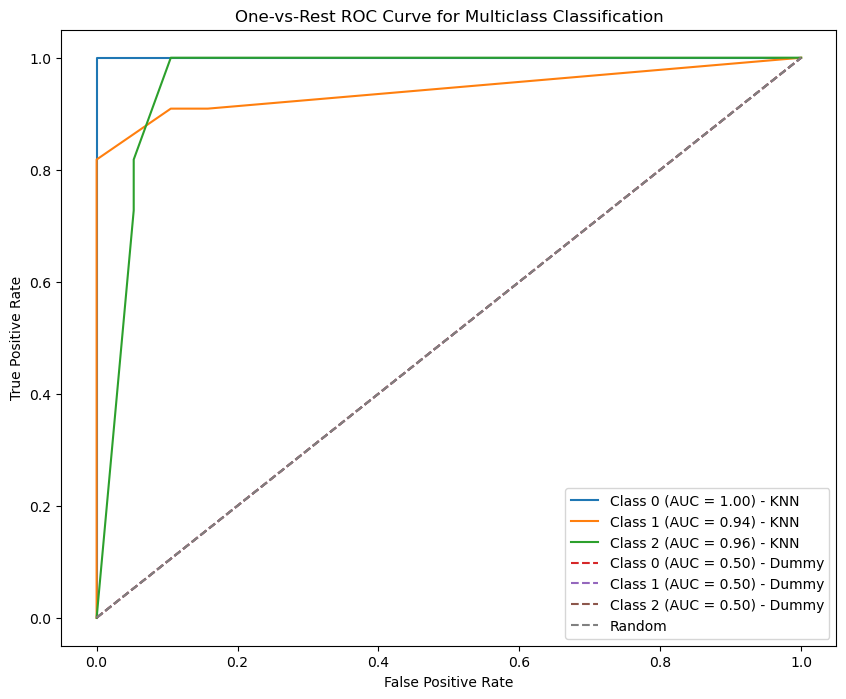

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

# Assuming y_test is the true class labels and y_scores is the predicted scores
y_test_bin = label_binarize(y_test, classes=range(3))

# KNN model predictions
# Make sure your KNN model has predict_proba method for probability estimates
y_scores = classifier.predict_proba(X_test)

# One-vs-Rest ROC curve and ROC-AUC calculation for KNN
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()

for i in range(3):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# Dummy Classifier (most frequent class) for comparison
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X_train, y_train)
y_scores_dummy = clf.predict_proba(X_test)

fpr_dummy = dict()
tpr_dummy = dict()
roc_auc_dummy = dict()

for i in range(3):
    fpr_dummy[i], tpr_dummy[i], _ = roc_curve(y_test_bin[:, i], y_scores_dummy[:, i])
    roc_auc_dummy[i] = auc(fpr_dummy[i], tpr_dummy[i])

# Plot the One-vs-Rest ROC curve for KNN and Dummy Classifier
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'Class {i} (AUC = {roc_auc_knn[i]:.2f}) - KNN')

for i in range(3):
    plt.plot(fpr_dummy[i], tpr_dummy[i], linestyle='--', label=f'Class {i} (AUC = {roc_auc_dummy[i]:.2f}) - Dummy')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

## 24. Perform k-fold validation

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from tabulate import tabulate

# Step 24: Perform k-fold validation with metrics
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    classifier.fit(X_train_fold, y_train_fold)
    y_pred_fold = classifier.predict(X_test_fold)
    
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    precision = precision_score(y_test_fold, y_pred_fold, average='weighted')
    recall = recall_score(y_test_fold, y_pred_fold, average='weighted')
    f1 = f1_score(y_test_fold, y_pred_fold, average='weighted')
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Tabulate the fold_results
fold_results = []
for i in range(5):
    fold_results.append([i+1, accuracy_scores[i], precision_scores[i], recall_scores[i], f1_scores[i]])

# Calculate mean and standard deviation
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)

fold_results.append(["Mean", mean_accuracy, mean_precision, mean_recall, mean_f1])
fold_results.append(["Standard Deviation", std_accuracy, std_precision, std_recall, std_f1])

print(tabulate(fold_results, headers=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score'], tablefmt='grid'))


+--------------------+------------+-------------+-----------+------------+
| Fold               |   Accuracy |   Precision |    Recall |   F1-score |
+====================+============+=============+===========+============+
| 1                  |  1         |   1         | 1         |  1         |
+--------------------+------------+-------------+-----------+------------+
| 2                  |  0.966667  |   0.969697  | 0.966667  |  0.966178  |
+--------------------+------------+-------------+-----------+------------+
| 3                  |  0.966667  |   0.97037   | 0.966667  |  0.96677   |
+--------------------+------------+-------------+-----------+------------+
| 4                  |  0.933333  |   0.942857  | 0.933333  |  0.932194  |
+--------------------+------------+-------------+-----------+------------+
| 5                  |  0.966667  |   0.969444  | 0.966667  |  0.966667  |
+--------------------+------------+-------------+-----------+------------+
| Mean               |  0

In [34]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(classifier, X, y, cv=kf)
print("Cross-validated Accuracy:", scores.mean())

Cross-validated Accuracy: 0.9666666666666668


# Manual Implementation of KNN-Iris Dataset

In [35]:
df.iloc[0]#gives 0th row

SepalLengthCm    5.1
SepalWidthCm     3.5
PetalLengthCm    1.4
PetalWidthCm     0.2
Species          0.0
Name: 0, dtype: float64

In [36]:
#euclidean distance
def euclidist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [37]:
df.shape

(150, 5)

## Considering K=3 & Split as (0.8,0.2)

In [38]:
X=df.iloc[:,:-1]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [39]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [40]:
def KnearestNeighbour(x_train,y_train,x_test,k):
    y_pred=[]
    for i in range(x_test.shape[0]):
        class_0=0
        class_1=0
        class_2=0
        dist=[]
        for j in range(x_train.shape[0]):
            d=euclidist(x_test.iloc[i],x_train.iloc[j])
            dist.append([d,y_train.iloc[j]])#for each distance and label(class of it)
        dist=sorted(dist)
        dist=dist[:k]#getting only k nearest neighbours
        for i in range(len(dist)):
            if(dist[i][1]==0):
                class_0+=1
            elif(dist[i][1]==1):
                class_1+=1
            else:
                class_2+=1
        if(class_0>class_1 and class_0>class_2):
            y_pred.append(0)
        elif(class_1>class_0 and class_1>class_2):
            y_pred.append(1)
        else:
            y_pred.append(2)
    return y_pred

In [41]:
indices = np.random.permutation(X.shape[0])

# Calculate the split index based on the desired ratio (80-20)
split_index = int(0.8 * X.shape[0])
x_train, x_test = X.iloc[indices[:split_index]], X.iloc[indices[split_index:]]
y_train, y_test = y.iloc[indices[:split_index]], y.iloc[indices[split_index:]]

In [42]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
91,6.1,3.0,4.6,1.4
109,7.2,3.6,6.1,2.5
74,6.4,2.9,4.3,1.3
38,4.4,3.0,1.3,0.2
99,5.7,2.8,4.1,1.3
...,...,...,...,...
117,7.7,3.8,6.7,2.2
105,7.6,3.0,6.6,2.1
102,7.1,3.0,5.9,2.1
78,6.0,2.9,4.5,1.5


In [43]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
75,6.6,3.0,4.4,1.4
125,7.2,3.2,6.0,1.8
12,4.8,3.0,1.4,0.1
106,4.9,2.5,4.5,1.7
138,6.0,3.0,4.8,1.8
19,5.1,3.8,1.5,0.3
30,4.8,3.1,1.6,0.2
149,5.9,3.0,5.1,1.8
29,4.7,3.2,1.6,0.2


In [44]:
y_train

91     1
109    2
74     1
38     0
99     1
      ..
117    2
105    2
102    2
78     1
98     1
Name: Species, Length: 120, dtype: int64

In [45]:
y_test

0      0
75     1
125    2
12     0
106    2
138    2
19     0
30     0
149    2
29     0
84     1
20     0
1      0
144    2
45     0
139    2
58     1
133    2
42     0
57     1
124    2
143    2
69     1
40     0
82     1
76     1
51     1
141    2
7      0
13     0
Name: Species, dtype: int64

## Implementation of KNN

In [46]:
y_pred=KnearestNeighbour(x_train,y_train,x_test,3)

In [47]:
y_pred

[0,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 0]

In [48]:
#checking if y_pred and y_test are same
if(y_pred==list(y_test)):
    print("y_pred and y_test are same")
else:
    print("y_pred and y_test are not same")

y_pred and y_test are not same


In [49]:
#checking metrices
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='macro')
f1=f1_score(y_test,y_pred,average='macro')
recall=recall_score(y_test,y_pred,average='macro')
print("Accuracy =",accuracy)
print("Precision =",precision)
print("F1 =",f1)
print("Recall =",recall)

Accuracy = 0.9333333333333333
Precision = 0.9333333333333332
F1 = 0.9259259259259259
Recall = 0.9333333333333332


### Seeing good metrices

<Axes: >

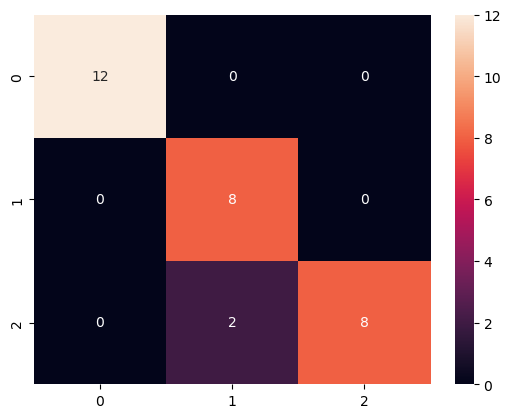

In [50]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

## For Prediction with Random Unknown Data

In [51]:
def Knnpredict(test,X,y,k):#X is dependent features and y is target variable
    #Using complete dataframe of depenedent features for good classification(with good accuracy) 
    class_0=0
    class_1=0
    class_2=0
    dist=[]
    for j in range(X.shape[0]):
        d=euclidist(X.iloc[j],test)
        dist.append([d,y.iloc[j]])#for each distance and label(class of it)
    dist=sorted(dist)
    dist=dist[:k]#getting only k nearest neighbours
    for i in range(len(dist)):
        if(dist[i][1]==0):
            class_0+=1
        elif(dist[i][1]==1):
            class_1+=1
        else:
            class_2+=1
    if(class_0>class_1 and class_0>class_2):
        y_pred=0
    elif(class_1>class_0 and class_1>class_2):
        y_pred=1
    else:
        y_pred=2
    if(y_pred==0):
        y_pred="Iris-setosa"
    elif(y_pred==1):
        y_pred="Iris-versicolor"
    else:
        y_pred="Iris-virginica"
    return y_pred

In [52]:
test=[6.7,3.3,5.7,2.1]

#Considering a sample with dependent features to test the prediction

In [53]:
predicted_y=Knnpredict(test,X,y,3)

In [54]:
print(f'Predicted value of Class for given input is {predicted_y}')

Predicted value of Class for given input is Iris-virginica
